In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../dataset-folder/expectativa_de_vida.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       183 non-null    int64  
 1   Country                          183 non-null    object 
 2   Life expectancy                  183 non-null    float64
 3   Adult Mortality                  183 non-null    float64
 4   infant deaths                    183 non-null    float64
 5   Alcohol                          182 non-null    float64
 6   percentage expenditure           183 non-null    float64
 7   Hepatitis B                      174 non-null    float64
 8   Measles                          183 non-null    float64
 9   BMI                              181 non-null    float64
 10  under-five deaths                183 non-null    float64
 11  Polio                            183 non-null    float64
 12  Total expenditure     

In [42]:
# yo:
#     Life expectancy                  183 non-null    float64
#     Adult Mortality                  183 non-null    float64
#     infant deaths                    183 non-null    float64
#     Alcohol
#     continent

In [44]:
countries = pd.read_csv("../dataset-folder/countries-UNSD.csv")
countries['Country'] = countries['Country or Area']
res = pd.merge(df, countries, on='Country')
res[['Country','Region Name','Sub-region Name']]

,Country,Region Name,Sub-region Name
0,Afghanistan,Asia,Southern Asia
1,Albania,Europe,Southern Europe
2,Algeria,Africa,Northern Africa
3,Angola,Africa,Sub-Saharan Africa
4,Antigua and Barbuda,Americas,Latin America and the Caribbean
...,...,...,...
175,Venezuela (Bolivarian Republic of),Americas,Latin America and the Caribbean
176,Viet Nam,Asia,South-eastern Asia
177,Yemen,Asia,Western Asia
178,Zambia,Africa,Sub-Saharan Africa


(array([ 1.,  1.,  2.,  4.,  2.,  2.,  3.,  7.,  5.,  5.,  4.,  2.,  6.,
         5.,  2.,  7.,  5.,  6.,  4.,  8.,  5., 10., 26., 17.,  8.,  4.,
         3.,  5., 11., 13.]),
 array([46.1125    , 47.32666667, 48.54083333, 49.755     , 50.96916667,
        52.18333333, 53.3975    , 54.61166667, 55.82583333, 57.04      ,
        58.25416667, 59.46833333, 60.6825    , 61.89666667, 63.11083333,
        64.325     , 65.53916667, 66.75333333, 67.9675    , 69.18166667,
        70.39583333, 71.61      , 72.82416667, 74.03833333, 75.2525    ,
        76.46666667, 77.68083333, 78.895     , 80.10916667, 81.32333333,
        82.5375    ]),
 <BarContainer object of 30 artists>)

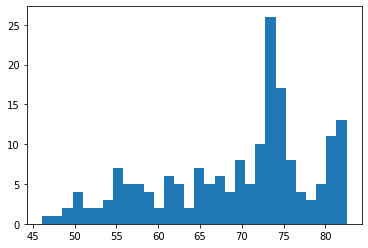

In [69]:
high_life_exp = df[df['Life expectancy']>60]
plt.hist(df['Life expectancy'],30)

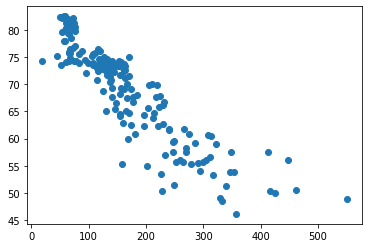

In [68]:
plt.scatter(df['Adult Mortality'],df['Life expectancy'])

(array([38., 32., 55., 19., 16., 12.,  5.,  3.,  2.,  1.]),
 array([ 18.75   ,  71.88125, 125.0125 , 178.14375, 231.275  , 284.40625,
        337.5375 , 390.66875, 443.8    , 496.93125, 550.0625 ]),
 <BarContainer object of 10 artists>)

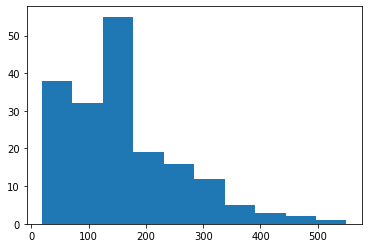

In [4]:
plt.hist(df['Adult Mortality'])

(array([50.,  5.,  4., 13.,  3.,  1.,  8.,  4.,  4.,  5.,  2.,  1.,  2.,
         3.,  0.,  1.,  0.,  0.,  1.,  3.,  0.,  1.,  1.,  2.,  1.,  0.,
         1.,  0.,  1.,  1.]),
 array([0.     , 0.33125, 0.6625 , 0.99375, 1.325  , 1.65625, 1.9875 ,
        2.31875, 2.65   , 2.98125, 3.3125 , 3.64375, 3.975  , 4.30625,
        4.6375 , 4.96875, 5.3    , 5.63125, 5.9625 , 6.29375, 6.625  ,
        6.95625, 7.2875 , 7.61875, 7.95   , 8.28125, 8.6125 , 8.94375,
        9.275  , 9.60625, 9.9375 ]),
 <BarContainer object of 30 artists>)

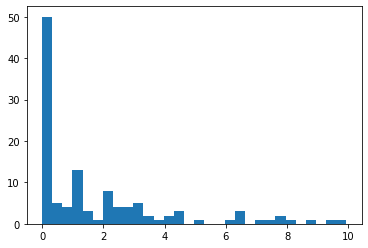

In [80]:
#INUTIL
low_inf_death = df[df['infant deaths']<10]
plt.hist(low_inf_death['infant deaths'],30)

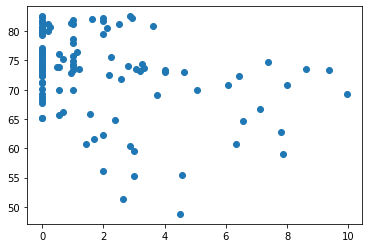

In [75]:
plt.scatter(low_inf_death['infant deaths'],low_inf_death['Life expectancy'])

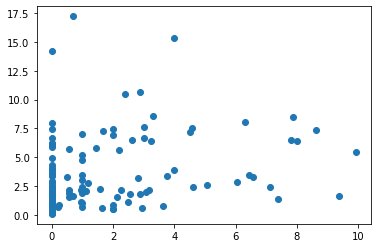

(array([49., 29., 16., 17., 15., 16., 13., 11.,  8.,  8.]),
 array([1.00000000e-02, 1.35873333e+00, 2.70746667e+00, 4.05620000e+00,
        5.40493333e+00, 6.75366667e+00, 8.10240000e+00, 9.45113333e+00,
        1.07998667e+01, 1.21486000e+01, 1.34973333e+01]),
 <BarContainer object of 10 artists>)

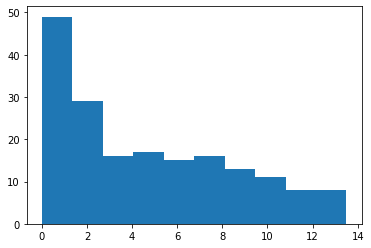

In [46]:
plt.hist(df['Alcohol'])

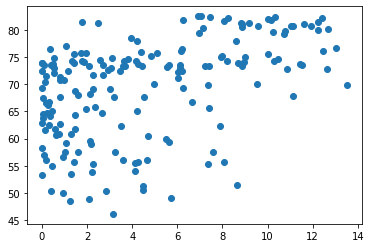

In [83]:
plt.scatter(df['Alcohol'],df['Life expectancy'])


Esperaba que correlacione negativamente (cuanto más alcohol, menos expectativa de vida). parece que lo que está detrás como causa común es la riqueza del país. En la tabla de abajo y el grafico se corrobora esa intuición

In [84]:
(res.groupby('Sub-region Name')['Alcohol'].mean()).sort_values()

Sub-region Name
Northern Africa                     0.648778
Southern Asia                       0.664486
Melanesia                           0.912667
Micronesia                          1.293000
Polynesia                           1.935667
Western Asia                        1.951961
South-eastern Asia                  2.000712
Central Asia                        2.700533
Sub-Saharan Africa                  2.874785
Eastern Asia                        5.086400
Latin America and the Caribbean     5.830860
Southern Europe                     8.196276
Northern America                    8.316333
Northern Europe                     9.518429
Australia and New Zealand           9.660792
Eastern Europe                     10.629933
Western Europe                     11.202667
Name: Alcohol, dtype: float64

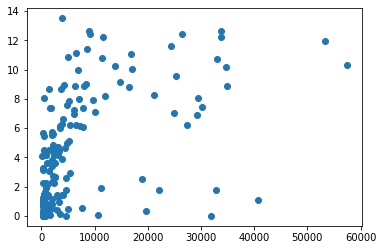

In [86]:
plt.scatter(df['GDP'],df['Alcohol'])


In [67]:
(res.groupby('Region Name')['Life expectancy'].mean()).sort_values()

Region Name
Africa      58.910216
Asia        71.194681
Oceania     71.214375
Americas    73.485417
Europe      77.518257
Name: Life expectancy, dtype: float64

In [66]:
(res.groupby('Sub-region Name')['Life expectancy'].mean()).sort_values()

Sub-region Name
Sub-Saharan Africa                 57.334511
Micronesia                         66.675000
Central Asia                       67.030000
Melanesia                          67.373437
Southern Asia                      68.094444
South-eastern Asia                 70.035227
Northern Africa                    70.990625
Eastern Europe                     72.548125
Latin America and the Caribbean    73.073185
Polynesia                          73.075000
Western Asia                       73.846691
Eastern Asia                       74.473750
Southern Europe                    78.296591
Northern Europe                    78.915000
Northern America                   79.875000
Western Europe                     81.400000
Australia and New Zealand          81.575000
Name: Life expectancy, dtype: float64